<a href="https://colab.research.google.com/github/Denysse-Sevilla/MAT-421/blob/main/Module_B_Section_17_4_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework #3- Denysse Sevilla**

## Section 17.4: Lagrange Polynomial Interpolation

Another type of interpolation is the **Lagrange polynomial interpolation**, which calculates a singular polynomial function that goes through all data points rather than identifying a series of polynomials that go between 2 points at a time (ex: cubic polynomials).

\
To compute Lagrange polynomials we use the following equation:

$L(x) = \sum_{i=1}^n y_i P_i(x)$ ,

where $P_i(x)$ is the Lagrange basis polynomial:

$ P_i(x) = ∏_{j=1, j\neq i}^n \frac{x-x_j}{x_i-x_j}$ .

Note: $∏$ means "multiply out", which in this case refers to the product of $\frac{x-x_j}{x_i-x_j}$ from $j=1(j\neq i)$ to $n$.

\
Additionally, when $i=j, P_i(x_j)=1$. And when $i\neq j, P_i(x_j) = 0$. As a result, $L(x_i)=y_i$ for every point!

\
Ex: Find the Lagrange basis polynomials for the data x=[0,2,4] and y=[1,2,1].

\
$P_1(x) = \frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)} = \frac{(x-2)(x-4)}{(0-2)(0-4)} = \frac{1}{8}(x^2-6x+8)$

$P_2(x) = \frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)} = \frac{(x-0)(x-4)}{(2-0)(2-4)} = -\frac{1}{4} (x^2-4x)$

$P_3(x) = \frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)} = \frac{(x-0)(x-2)}{(4-0)(4-2)} = \frac{1}{8}(x^2-2x) $



We can calculate the Lagrange polynomial in scipy using the *lagrange* function:

In [1]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

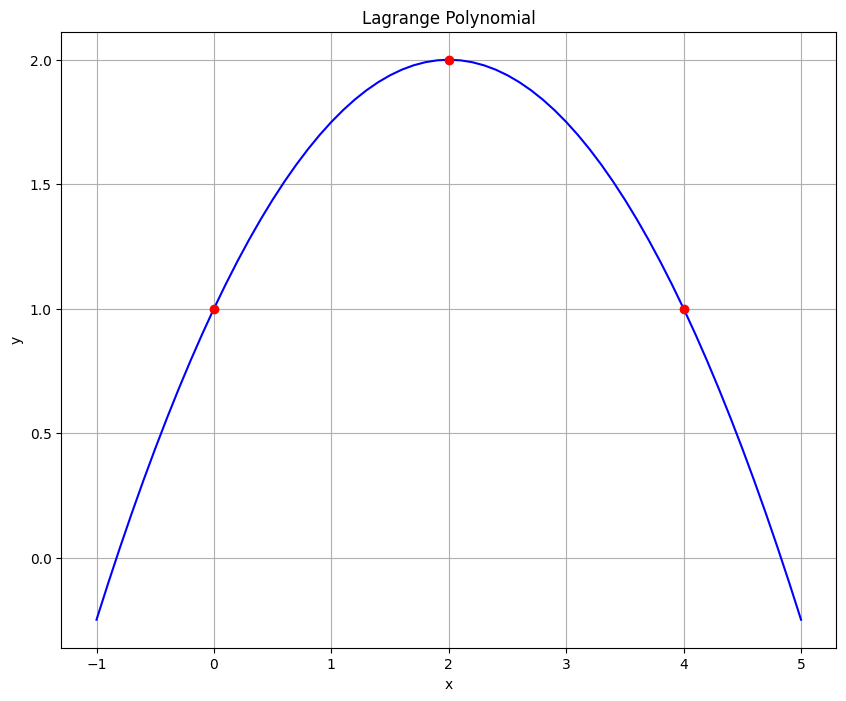

In [5]:
x = [0, 2, 4]
y = [1, 2, 1]

x_new = np.arange(-1, 5.1, 0.1)

f = lagrange(x,y)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Section 17.5: Newton's Polynomial Interpolation

**Newton's polynomial interpolation** is another way to fit for a set of *n* points, generally written as:

\
$f(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + ... + a_n(a-x_0)(x-x_1) ... (x-x_n)$

\
or

\
$f(x) = ∑_{i=0} ^n a_in_i(x) $,

where $n_i(x) = ∏_{j=0} ^{i-1}(x-x_j)$.

\
Calculating the coefficients $a_i$, also known as **divided differences**, is actually quite simplistic:

\
$f(x_i) = y_i$ for data points $(x_i, y_i)$. Hence,

$f(x_0) = a_0 = y_0$

and

$f(x_1) = a_0 + a_1(x_1-x_0) = y_1$, meaning:

$a_1 = \frac{y_1-y_0}{x_1-x_0}$.

As a result, $(x_2, y_2)$ gives

$a_2 = \frac{\frac{y_2-y_1}{x_2-x_1}-\frac{y_1-y_0}{x_1-x_0}}{x_2-x_0} $

\
and $(x_3, y_3)$ gives

$a_3 = \frac{\frac{\frac{y_3-y_2}{x_3-x_2}-\frac{y_2-y_1}{x_2-x_1}}{x_3-x_1}- \frac{\frac{y_2-y_1}{x_2-x_1}-\frac{y_1-y_0}{x_1-x_0}}{x_2-x_0} }{x_3-x_0} $

and so on...

\
All of this can be rewritten:

$f[x_1,x_0] = \frac{y_1-y_0}{x_1-x_0}$

and

$f[x_2, x_1, x_0] = \frac{\frac{y_2-y_1}{x_2-x_1}-\frac{y_1-y_0}{x_1-x_0}}{x_2-x_0} = \frac{f[x_2,x_1]-f[x_1,x_0]}{x_2-x_0} $

and so on...

\
As a result, we get the following (**$n^{th}$ - order divided difference**) iteration equation:

\
$f[x_n, x_{n-1}, ..., x_1, x_0] = \frac{f[x_n,x_{n-1}, ...,x_1,x_0]-f[x_{n-1},x_{n-2}, ...,x_1,x_0]}{x_n-x_0} $

\
As shown, once the lower coefficients are calculated, they don't change. Thus, we only need to calculate higher differences when we add new data points.

\
Ex: Determining the $3^{rd}$- order divided difference $f[x_0,x_1,x_2,x_3]$ needs the following values:

\begin{bmatrix}
x_0 & f[x_0] & &  & \\
x_1 & f[x_1] & f[x_0,x_1] &  & \\
x_2 & f[x_2] & f[x_1,x_2] & f[x_0,x_1,x_2] & \\
x_3 & f[x_3] & f[x_2,x_3] & f[x_1,x_2,x_3] & f[x_0,x_1,x_2,x_3]\\
\end{bmatrix}

\
Ex: Determine Newton's interpolation polynomial in Python for x = [-6, -4, 0, 2], y = [-3, 5, 1, 4].

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def divided_diff(x,y): # calculates the divided differences table
    n = len(y)
    coef = np.zeros([n,n])
    coef[:,0] = y # the first column is y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
            (coef[i+1][j-1] - coef[i][j-1])/(x[i+j] - x[i])
    return coef

def newton_poly(coef, x_data, x): # evaluates the newton polynomial at x
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k])*p
    return p

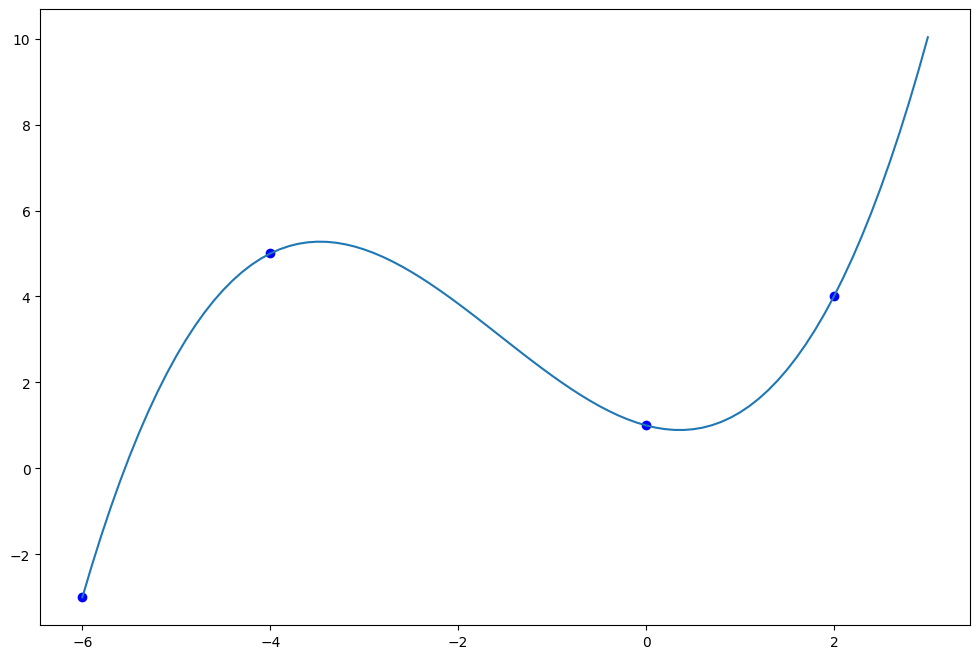

In [ ]:
x = np.array([-6, -4, 0, 2])
y = np.array([-3, 5, 1, 4])

z = divided_diff(x,y)[0, :] # gets the divided difference coef

x_new = np.arange(-6, 3.1, .1)
y_new = newton_poly(z, x, x_new)

plt.figure(figsize = (12,8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)